# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [7]:
# Write your code here
import nltk
nltk.download('averaged_perceptron_tagger')
import re
from collections import defaultdict
import nltk

# Download the necessary NLTK resource
nltk.download('averaged_perceptron_tagger')

def preprocess_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    return text

def generate_ngrams(text, n):
    words = text.split()
    ngrams = zip(*[words[i:] for i in range(n)])
    return [" ".join(ngram) for ngram in ngrams]

def count_ngrams(texts, n):
    ngram_counts = defaultdict(int)
    for text in texts:
        text = preprocess_text(text)
        ngrams = generate_ngrams(text, n)
        for ngram in ngrams:
            ngram_counts[ngram] += 1
    return ngram_counts

def calculate_bigram_probabilities(texts):
    bigram_probabilities = defaultdict(float)
    bigram_counts = defaultdict(int)
    unigram_counts = defaultdict(int)

    for text in texts:
        text = preprocess_text(text)
        words = text.split()
        for i in range(len(words) - 1):
            bigram = tuple(words[i:i+2])
            bigram_counts[bigram] += 1
            unigram_counts[words[i]] += 1

    for bigram, count in bigram_counts.items():
        w2, w1 = bigram
        probability = count / unigram_counts[w2]
        bigram_probabilities[bigram] = probability

    return bigram_probabilities

def extract_noun_phrases(texts):
    noun_phrases = []
    for text in texts:
        text = preprocess_text(text)
        words = text.split()
        tagged_words = nltk.pos_tag(words)
        noun_phrase = [word for word, tag in tagged_words if tag.startswith('NN')]
        noun_phrases.append(" ".join(noun_phrase))
    return noun_phrases

def calculate_relative_probabilities(texts):
    noun_phrases = extract_noun_phrases(texts)
    noun_phrase_counts = defaultdict(int)
    for phrase in noun_phrases:
        noun_phrase_counts[phrase] += 1
    max_frequency = max(noun_phrase_counts.values())
    relative_probabilities = {}
    for i, text in enumerate(texts):
        relative_probabilities[i] = {}
        for phrase in noun_phrase_counts:
            relative_probabilities[i][phrase] = noun_phrase_counts[phrase] / max_frequency
    return relative_probabilities

# Sample dataset (100 reviews)
dataset = [
    "One of the most anticipated films of the year for many people, myself included, Oppenheimer largely delivers. Much of it's great. I feel like I loved two of its three hours, and liked the other hour",
    "I have been looking forward to seeing this movie since it came out. I studied Oppenheimer in college and he was a brilliant, complicated, odd man. Very interesting to study him. I'm not sure what I expected of this movie",
    "Amazing cinematography, Exceptional acting and terrifying Soundtracks.",
    "It's isn't a masterpiece. It's a decent biopic about an interesting person, has some good performances, and it's probably about 30 minutes too long.",
]

# (1)Count frequencies of trigrams (N=3)
trigram_counts = count_ngrams(dataset, 3)
print("Trigram frequencies:")
for trigram, count in trigram_counts.items():
    print(trigram, count)

# (2)Calculate probabilities for bigrams
bigram_probabilities = calculate_bigram_probabilities(dataset)
print("\nBigram probabilities:")
for bigram, probability in bigram_probabilities.items():
    print(bigram, probability)

# (3)Calculate relative probabilities of noun phrases
relative_probabilities = calculate_relative_probabilities(dataset)
print("\nRelative probabilities of noun phrases:")
print("Review\t\tNoun Phrase\t\tRelative Probability")
for i, probs in relative_probabilities.items():
    for noun_phrase, probability in probs.items():
        print(f"{i+1}\t\t{noun_phrase}\t\t{probability}")



Trigram frequencies:
one of the 1
of the most 1
the most anticipated 1
most anticipated films 1
anticipated films of 1
films of the 1
of the year 1
the year for 1
year for many 1
for many people 1
many people myself 1
people myself included 1
myself included oppenheimer 1
included oppenheimer largely 1
oppenheimer largely delivers 1
largely delivers much 1
delivers much of 1
much of its 1
of its great 1
its great i 1
great i feel 1
i feel like 1
feel like i 1
like i loved 1
i loved two 1
loved two of 1
two of its 1
of its three 1
its three hours 1
three hours and 1
hours and liked 1
and liked the 1
liked the other 1
the other hour 1
i have been 1
have been looking 1
been looking forward 1
looking forward to 1
forward to seeing 1
to seeing this 1
seeing this movie 1
this movie since 1
movie since it 1
since it came 1
it came out 1
came out i 1
out i studied 1
i studied oppenheimer 1
studied oppenheimer in 1
oppenheimer in college 1
in college and 1
college and he 1
and he was 1
he was a

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [2]:
# Write your code here
import math

# Step 1: Tokenize documents and query
# For demonstration purposes, let's assume we have some sample documents
documents = [
    "One of the most anticipated films of the year for many people, myself included, Oppenheimer largely delivers. Much of it's great. I feel like I loved two of its three hours",
    "The film looks great is brilliantly acted but there's virtually no actual plot, it's constantly jump back and forward and evey couple of minutes",
    "Authentic audio-visual journey to the era of the birth of atomic genesis, which both terrifies and astonishes you with its nonlinear storytelling"
]

query = "One of the most anticipated films of the year for many people, myself included, Oppenheimer largely delivers. Much of it's great. I feel like I loved two of its three hours"

# Tokenize function
def tokenize(text):
    return text.lower().split()

# Step 2: Calculate TF for each term in each document
def calculate_tf(document):
    tf = {}
    tokens = tokenize(document)
    total_terms = len(tokens)
    for term in tokens:
        tf[term] = tf.get(term, 0) + 1 / total_terms
    return tf

# Step 3: Calculate IDF for each term
def calculate_idf(documents):
    idf = {}
    total_documents = len(documents)
    for document in documents:
        tokens = set(tokenize(document))
        for term in tokens:
            idf[term] = idf.get(term, 0) + 1
    for term, freq in idf.items():
        idf[term] = math.log(total_documents / freq)
    return idf

# Step 4: Compute TF-IDF for each term in each document
def calculate_tfidf(documents, idf):
    tfidf_matrix = []
    for document in documents:
        tfidf = {}
        tf = calculate_tf(document)
        tokens = tokenize(document)
        for term in tokens:
            tfidf[term] = tf[term] * idf[term]
        tfidf_matrix.append(tfidf)
    return tfidf_matrix

# Step 5: Represent each document as a vector in the TF-IDF space
def vectorize_documents(documents, idf):
    tfidf_matrix = calculate_tfidf(documents, idf)
    vectors = []
    for tfidf in tfidf_matrix:
        vector = [tfidf.get(term, 0) for term in idf.keys()]
        vectors.append(vector)
    return vectors

# Step 6: Represent the query as a vector in the TF-IDF space
def vectorize_query(query, idf):
    query_tfidf = {}
    tf = calculate_tf(query)
    tokens = tokenize(query)
    for term in tokens:
        query_tfidf[term] = tf[term] * idf[term]
    return [query_tfidf.get(term, 0) for term in idf.keys()]

# Step 7: Calculate cosine similarity between query vector and each document vector
def cosine_similarity(query_vector, document_vectors):
    similarities = []
    for doc_vector in document_vectors:
        dot_product = sum(x * y for x, y in zip(query_vector, doc_vector))
        query_norm = math.sqrt(sum(x ** 2 for x in query_vector))
        doc_norm = math.sqrt(sum(x ** 2 for x in doc_vector))
        similarity = dot_product / (query_norm * doc_norm)
        similarities.append(similarity)
    return similarities

# Step 8: Rank the documents based on cosine similarity
def rank_documents(query, documents):
    idf = calculate_idf(documents)
    document_vectors = vectorize_documents(documents, idf)
    query_vector = vectorize_query(query, idf)
    similarities = cosine_similarity(query_vector, document_vectors)
    ranked_documents = sorted(zip(documents, similarities), key=lambda x: x[1], reverse=True)
    return ranked_documents

# Example usage
ranked_documents = rank_documents(query, documents)
for i, (document, similarity) in enumerate(ranked_documents, start=1):
    print(f"Rank {i}: {document} - Similarity: {similarity}")







Rank 1: One of the most anticipated films of the year for many people, myself included, Oppenheimer largely delivers. Much of it's great. I feel like I loved two of its three hours - Similarity: 1.0000000000000002
Rank 2: Authentic audio-visual journey to the era of the birth of atomic genesis, which both terrifies and astonishes you with its nonlinear storytelling - Similarity: 0.0067168934159853606
Rank 3: The film looks great is brilliantly acted but there's virtually no actual plot, it's constantly jump back and forward and evey couple of minutes - Similarity: 0.006107596198157592


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

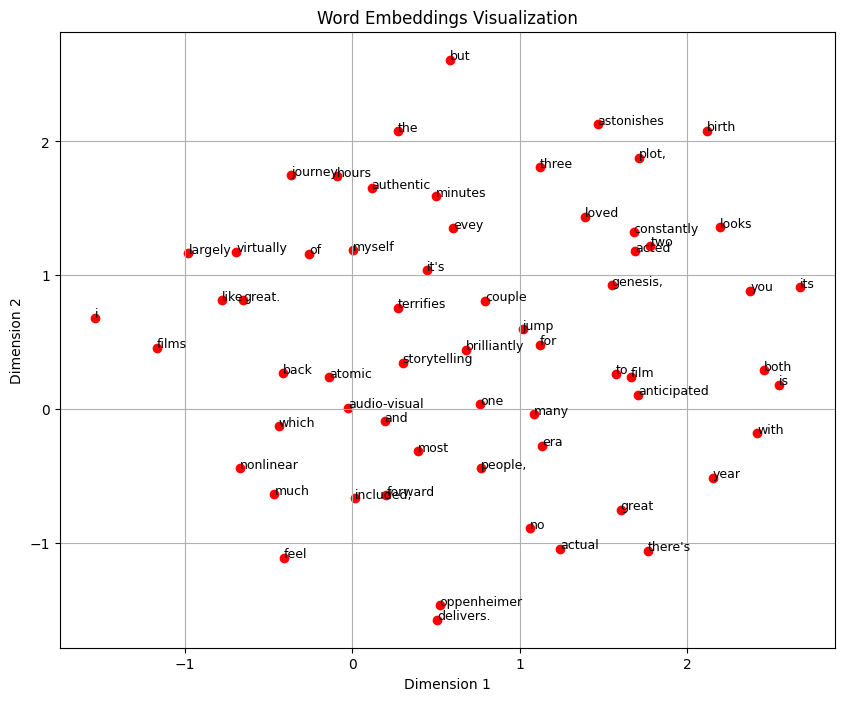

In [4]:
# Write your code here
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Sample text data
text_data = [
    "One of the most anticipated films of the year for many people, myself included, Oppenheimer largely delivers. Much of it's great. I feel like I loved two of its three hours",
    "The film looks great is brilliantly acted but there's virtually no actual plot, it's constantly jump back and forward and evey couple of minutes",
    "Authentic audio-visual journey to the era of the birth of atomic genesis, which both terrifies and astonishes you with its nonlinear storytelling"
]

# Step 1: Tokenize and preprocess the text data
tokenized_data = [sentence.lower().split() for sentence in text_data]

# Step 2: Train a Word2Vec model
model = Word2Vec(sentences=tokenized_data, vector_size=300, window=5, min_count=1, workers=4)

# Step 3: Visualize the word embeddings
# Function to plot word embeddings using t-SNE
def plot_embeddings(model):
    words = list(model.wv.index_to_key)
    word_vectors = model.wv.vectors

    tsne = TSNE(n_components=2, random_state=42)
    word_vectors_tsne = tsne.fit_transform(word_vectors)

    plt.figure(figsize=(10, 8))
    for i, word in enumerate(words):
        x, y = word_vectors_tsne[i, :]
        plt.scatter(x, y, marker='o', color='red')
        plt.text(x, y, word, fontsize=9)
    plt.title('Word Embeddings Visualization')
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.grid(True)
    plt.show()

# Plot word embeddings
plot_embeddings(model)







## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file


# Link: https://github.com/Snehareddynayini/INFO5731_Nayini_SnehaReddy_11618990/blob/main/INFO%205731_DATA_SET_ASSIGN_4.zip



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# I feel this assignment is more challenging.